In [1]:
%load_ext autoreload
%autoreload 2
import warnings
import sys
sys.path.append("../")
from pathlib import Path
from argparse import ArgumentParser
warnings.filterwarnings('ignore')

# torch and lightning imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
import pytorch_lightning as pl
from torchvision import transforms

from pytorch_lightning.loggers import WandbLogger

import os
#import pycimg
from glob import glob

import cv2

import numpy as np
import matplotlib.pyplot as plt
import random
import json
import datetime
from matplotlib.backends.backend_pdf import PdfPages
import zlib
from PIL import Image
from tqdm import tqdm
from funcs_rayosX import  recorte
from funcs_rayosX import  loadRayosX



np.set_printoptions(precision=2)

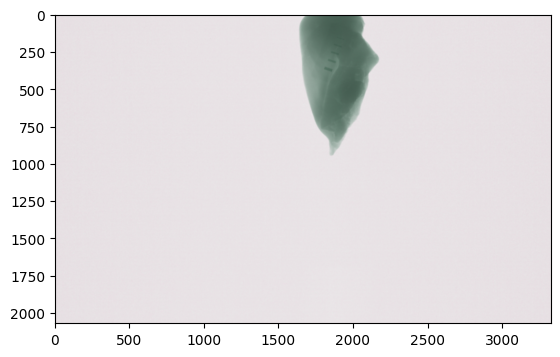

In [2]:
usuario=os.getenv('USER')

if usuario=='csanchis':
    directorio_datos='/home/csanchis/mscanData/rayosX/pollo'
elif usuario=='aalbiol':
    directorio_datos='/home/aalbiol/owc/mscanData/rayosX/pollo'
else:
    raise ValueError('Usuario no reconocido')

ilow=os.path.join(directorio_datos,"20240708_073122_pechugasTestigo/LOWpechugasTestigo_00006.png")
im,imf=loadRayosX(ilow,maxval=2**16-1,sigma=2)
_=plt.imshow(imf)

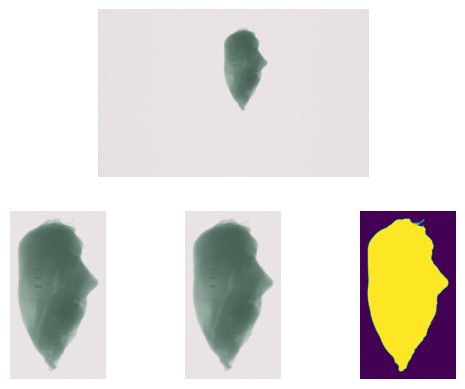

In [4]:
ilow=os.path.join(directorio_datos,"20240708_073122_pechugasTestigo/LOWpechugasTestigo_00007.png")
im,imf=loadRayosX(ilow,maxval=2**16-1,sigma=2)
_=plt.subplot(2,1,1)
_=plt.imshow(imf)
_=plt.axis('off')
out,outf,mi=recorte(im,imf,orla=50)
_=plt.subplot(2,3,4)
_=plt.imshow(outf)
_=plt.axis('off')
_=plt.subplot(2,3,5)
_=plt.imshow(out)
_=plt.axis('off')
_=plt.subplot(2,3,6)
_=plt.imshow(mi)
_=plt.axis('off')

# Entremuslos

In [14]:
dir_entremuslos="mscanData/rayosX/pollo/"
dir_recortes="mscanData/rayosX/pollo/recortes_good"
user=os.getenv('USER')

if user=='csanchis':
    userdir="/home/csanchis"

elif user=="aalbiol":
    userdir="/home/aalbiol/owc"


dir_entremuslos=os.path.join(userdir,dir_entremuslos)
dir_recortes=os.path.join(userdir,dir_recortes)    
pgl=glob(dir_entremuslos+"/*/*LOWentremuslo*.png")
print(len(pgl))
print(pgl[0])


205
/home/aalbiol/owc/mscanData/rayosX/pollo/20240708_073400_entremusloGood/LOWentremusloGood_00101.png


In [11]:
maxval=2**16-1
with PdfPages('../pdfs_pollo/entremuslos.pdf') as pdf:
    for im in tqdm(pgl[:20]):
        print(im)
        z,zf=loadRayosX(im,maxval=maxval,sigma=5) #(H,W,3) #low, high, zeff
        assert z is not None
        assert zf is not None
        resultado=recorte(z,zf,threshold=0.8,orla=25)
        if(resultado is None):
            print("El area de carne no es suficiente")
            continue
        out,outf,mi =resultado
        _=plt.figure()
        _=plt.subplot(2,1,1)
        _=plt.imshow(zf)
        _=plt.axis('off')

        _=plt.subplot(2,3,4)
        _=plt.imshow(outf)
        _=plt.axis('off')
        _=plt.subplot(2,3,5)
        _=plt.imshow(out)
        _=plt.axis('off')
        _=plt.subplot(2,3,6)
        _=plt.imshow(mi)
        _=plt.axis('off')
        
        fig = plt.gcf()
        pdf.savefig(fig)
        plt.close(fig)

  0%|          | 0/20 [00:00<?, ?it/s]

/home/aalbiol/owc/mscanData/rayosX/pollo/20240708_073400_entremusloGood/LOWentremusloGood_00101.png


  5%|▌         | 1/20 [00:00<00:13,  1.44it/s]

/home/aalbiol/owc/mscanData/rayosX/pollo/20240708_073400_entremusloGood/LOWentremusloGood_00027.png


 10%|█         | 2/20 [00:01<00:09,  1.91it/s]

El area de carne no es suficiente
/home/aalbiol/owc/mscanData/rayosX/pollo/20240708_073400_entremusloGood/LOWentremusloGood_00048.png


 15%|█▌        | 3/20 [00:01<00:10,  1.67it/s]

/home/aalbiol/owc/mscanData/rayosX/pollo/20240708_073400_entremusloGood/LOWentremusloGood_00117.png


 20%|██        | 4/20 [00:02<00:10,  1.48it/s]

/home/aalbiol/owc/mscanData/rayosX/pollo/20240708_073400_entremusloGood/LOWentremusloGood_00084.png


 25%|██▌       | 5/20 [00:03<00:10,  1.49it/s]

/home/aalbiol/owc/mscanData/rayosX/pollo/20240708_073400_entremusloGood/LOWentremusloGood_00021.png


 30%|███       | 6/20 [00:03<00:09,  1.49it/s]

/home/aalbiol/owc/mscanData/rayosX/pollo/20240708_073400_entremusloGood/LOWentremusloGood_00008.png


 35%|███▌      | 7/20 [00:04<00:08,  1.50it/s]

/home/aalbiol/owc/mscanData/rayosX/pollo/20240708_073400_entremusloGood/LOWentremusloGood_00069.png


 40%|████      | 8/20 [00:05<00:07,  1.51it/s]

/home/aalbiol/owc/mscanData/rayosX/pollo/20240708_073400_entremusloGood/LOWentremusloGood_00109.png


 45%|████▌     | 9/20 [00:05<00:07,  1.51it/s]

/home/aalbiol/owc/mscanData/rayosX/pollo/20240708_073400_entremusloGood/LOWentremusloGood_00061.png


 50%|█████     | 10/20 [00:06<00:06,  1.51it/s]

/home/aalbiol/owc/mscanData/rayosX/pollo/20240708_073400_entremusloGood/LOWentremusloGood_00087.png


 55%|█████▌    | 11/20 [00:07<00:05,  1.51it/s]

/home/aalbiol/owc/mscanData/rayosX/pollo/20240708_073400_entremusloGood/LOWentremusloGood_00088.png


 60%|██████    | 12/20 [00:07<00:05,  1.50it/s]

/home/aalbiol/owc/mscanData/rayosX/pollo/20240708_073400_entremusloGood/LOWentremusloGood_00106.png


 65%|██████▌   | 13/20 [00:08<00:04,  1.52it/s]

/home/aalbiol/owc/mscanData/rayosX/pollo/20240708_073400_entremusloGood/LOWentremusloGood_00044.png


 70%|███████   | 14/20 [00:09<00:04,  1.50it/s]

/home/aalbiol/owc/mscanData/rayosX/pollo/20240708_073400_entremusloGood/LOWentremusloGood_00020.png


 75%|███████▌  | 15/20 [00:09<00:03,  1.49it/s]

/home/aalbiol/owc/mscanData/rayosX/pollo/20240708_073400_entremusloGood/LOWentremusloGood_00070.png


 80%|████████  | 16/20 [00:10<00:02,  1.48it/s]

/home/aalbiol/owc/mscanData/rayosX/pollo/20240708_073400_entremusloGood/LOWentremusloGood_00118.png


 85%|████████▌ | 17/20 [00:11<00:02,  1.41it/s]

/home/aalbiol/owc/mscanData/rayosX/pollo/20240708_073400_entremusloGood/LOWentremusloGood_00017.png


 90%|█████████ | 18/20 [00:12<00:01,  1.44it/s]

/home/aalbiol/owc/mscanData/rayosX/pollo/20240708_073400_entremusloGood/LOWentremusloGood_00045.png


 95%|█████████▌| 19/20 [00:12<00:00,  1.40it/s]

/home/aalbiol/owc/mscanData/rayosX/pollo/20240708_073400_entremusloGood/LOWentremusloGood_00083.png


100%|██████████| 20/20 [00:13<00:00,  1.49it/s]


In [10]:
# Generar muestra de resultados
out_dir="entremuslos_binario"
os.makedirs(out_dir,exist_ok=True)
out_dir2="entremuslos_filtrada"
os.makedirs(out_dir2,exist_ok=True)
maxval=2**16-1
for im in tqdm(pgl[:20]):
    bim=os.path.basename(im)
    print(bim)
    nameout=os.path.join(out_dir,bim)
    nameout2=os.path.join(out_dir2,bim)
    z,zf=loadRayosX(im,maxval=maxval,sigma=5) #(H,W,3) #low, high, zeff
    assert z is not None
    assert zf is not None
    resultado=recorte(z,zf,threshold=0.8,orla=25)
    if(resultado is None):
        print("El area de carne no es suficiente")
        continue
    out,outf,mi =resultado
    
    mi=(mi>0.5).astype(np.uint8)*255
    zf=(zf*255).astype(np.uint8)
    cv2.imwrite(nameout,mi)
    cv2.imwrite(nameout2,zf)
    

  0%|          | 0/20 [00:00<?, ?it/s]

LOWentremusloGood_00101.png


  5%|▌         | 1/20 [00:00<00:09,  1.90it/s]

LOWentremusloGood_00027.png


 10%|█         | 2/20 [00:00<00:08,  2.16it/s]

El area de carne no es suficiente
LOWentremusloGood_00048.png


 15%|█▌        | 3/20 [00:01<00:08,  2.05it/s]

LOWentremusloGood_00117.png


 20%|██        | 4/20 [00:02<00:08,  1.91it/s]

LOWentremusloGood_00084.png


 25%|██▌       | 5/20 [00:02<00:07,  1.92it/s]

LOWentremusloGood_00021.png


 30%|███       | 6/20 [00:03<00:07,  1.92it/s]

LOWentremusloGood_00008.png


 35%|███▌      | 7/20 [00:03<00:06,  1.94it/s]

LOWentremusloGood_00069.png


 40%|████      | 8/20 [00:04<00:06,  1.95it/s]

LOWentremusloGood_00109.png


 45%|████▌     | 9/20 [00:04<00:05,  1.96it/s]

LOWentremusloGood_00061.png


 50%|█████     | 10/20 [00:05<00:05,  1.97it/s]

LOWentremusloGood_00087.png


 55%|█████▌    | 11/20 [00:05<00:04,  1.93it/s]

LOWentremusloGood_00088.png


 60%|██████    | 12/20 [00:06<00:04,  1.94it/s]

LOWentremusloGood_00106.png


 65%|██████▌   | 13/20 [00:06<00:03,  1.93it/s]

LOWentremusloGood_00044.png


 70%|███████   | 14/20 [00:07<00:03,  1.93it/s]

LOWentremusloGood_00020.png


 75%|███████▌  | 15/20 [00:07<00:02,  1.91it/s]

LOWentremusloGood_00070.png


 80%|████████  | 16/20 [00:08<00:02,  1.86it/s]

LOWentremusloGood_00118.png


 85%|████████▌ | 17/20 [00:08<00:01,  1.86it/s]

LOWentremusloGood_00017.png


 90%|█████████ | 18/20 [00:09<00:01,  1.82it/s]

LOWentremusloGood_00045.png


 95%|█████████▌| 19/20 [00:09<00:00,  1.81it/s]

LOWentremusloGood_00083.png


100%|██████████| 20/20 [00:10<00:00,  1.91it/s]


In [15]:

#Generar recortes de todas las imagenes
os.makedirs(dir_recortes,exist_ok=True)


maxval=2**16-1
for im in tqdm(pgl):
    bim=os.path.basename(im)
    nameout=os.path.join(dir_recortes,bim)
    
    z,zf=loadRayosX(im,maxval=maxval,sigma=5) #(H,W,3) #low, high, zeff
    assert z is not None
    assert zf is not None
    resultado=recorte(z,zf,threshold=0.8,orla=25)
    if(resultado is None):
        print("El area de carne no es suficiente")
        continue
    out,outf,mi =resultado
    out=(out*maxval).astype(np.uint16)
    cv2.imwrite(nameout,out)
    

  1%|          | 2/205 [00:00<01:20,  2.51it/s]

El area de carne no es suficiente


 21%|██▏       | 44/205 [00:19<01:14,  2.16it/s]

El area de carne no es suficiente


 47%|████▋     | 97/205 [00:43<00:47,  2.26it/s]

El area de carne no es suficiente


100%|██████████| 205/205 [01:35<00:00,  2.14it/s]


# Pechuga

In [21]:
dir_pechugas="mscanData/rayosX/pollo/"
user=os.getenv('USER')
if user=='csanchis':
    dir_pechugas=os.path.join("/home/csanchis",dir_pechugas)
elif user=="aalbiol":
    dir_pechugas=os.path.join("/home/aalbiol/owc",dir_pechugas)

pgl=glob(dir_pechugas+"/*/*LOWpechuga*.png")
print(len(pgl))
print(pgl[0])
print(os.path.dirname(pgl[0]))

166
/home/aalbiol/owc/mscanData/rayosX/pollo/20240708_073122_pechugasTestigo/LOWpechugasTestigo_00054.png
/home/aalbiol/owc/mscanData/rayosX/pollo/20240708_073122_pechugasTestigo


In [13]:
maxval=2**16-1
with PdfPages('../pdfs_pollo/pechuga.pdf') as pdf:
    for im in tqdm(pgl[:20]):
        print(im)
        z,zf=loadRayosX(im,maxval=maxval,sigma=5) #(H,W,3) #low, high, zeff
        assert z is not None
        assert zf is not None
        resultado=recorte(z,zf,threshold=0.8,orla=25)
        if(resultado is None):
            print("El area de carne no es suficiente")
            continue
        out,outf,mi =resultado
        _=plt.figure()
        _=plt.subplot(2,1,1)
        _=plt.imshow(zf)
        _=plt.axis('off')

        _=plt.subplot(2,3,4)
        _=plt.imshow(outf)
        _=plt.axis('off')
        _=plt.subplot(2,3,5)
        _=plt.imshow(out)
        _=plt.axis('off')
        _=plt.subplot(2,3,6)
        _=plt.imshow(mi)
        _=plt.axis('off')
        
        fig = plt.gcf()
        pdf.savefig(fig)
        plt.close(fig)

  0%|          | 0/20 [00:00<?, ?it/s]

/home/aalbiol/owc/mscanData/rayosX/pollo/20240708_072803_pechugasGood/LOWpechugasGood_00025.png


  5%|▌         | 1/20 [00:00<00:12,  1.57it/s]

/home/aalbiol/owc/mscanData/rayosX/pollo/20240708_072803_pechugasGood/LOWpechugasGood_00058.png


 10%|█         | 2/20 [00:01<00:11,  1.59it/s]

/home/aalbiol/owc/mscanData/rayosX/pollo/20240708_072803_pechugasGood/LOWpechugasGood_00015.png


 15%|█▌        | 3/20 [00:01<00:10,  1.61it/s]

/home/aalbiol/owc/mscanData/rayosX/pollo/20240708_072803_pechugasGood/LOWpechugasGood_00021.png


 20%|██        | 4/20 [00:02<00:09,  1.66it/s]

/home/aalbiol/owc/mscanData/rayosX/pollo/20240708_072803_pechugasGood/LOWpechugasGood_00036.png


 25%|██▌       | 5/20 [00:03<00:08,  1.69it/s]

/home/aalbiol/owc/mscanData/rayosX/pollo/20240708_072803_pechugasGood/LOWpechugasGood_00002.png


 30%|███       | 6/20 [00:03<00:08,  1.71it/s]

/home/aalbiol/owc/mscanData/rayosX/pollo/20240708_072803_pechugasGood/LOWpechugasGood_00019.png


 35%|███▌      | 7/20 [00:04<00:07,  1.72it/s]

/home/aalbiol/owc/mscanData/rayosX/pollo/20240708_072803_pechugasGood/LOWpechugasGood_00066.png


 40%|████      | 8/20 [00:04<00:07,  1.69it/s]

/home/aalbiol/owc/mscanData/rayosX/pollo/20240708_072803_pechugasGood/LOWpechugasGood_00020.png


 45%|████▌     | 9/20 [00:05<00:06,  1.70it/s]

/home/aalbiol/owc/mscanData/rayosX/pollo/20240708_072803_pechugasGood/LOWpechugasGood_00042.png


 50%|█████     | 10/20 [00:05<00:05,  1.71it/s]

/home/aalbiol/owc/mscanData/rayosX/pollo/20240708_072803_pechugasGood/LOWpechugasGood_00054.png


 55%|█████▌    | 11/20 [00:06<00:05,  1.69it/s]

/home/aalbiol/owc/mscanData/rayosX/pollo/20240708_072803_pechugasGood/LOWpechugasGood_00039.png


 60%|██████    | 12/20 [00:07<00:04,  1.72it/s]

/home/aalbiol/owc/mscanData/rayosX/pollo/20240708_072803_pechugasGood/LOWpechugasGood_00012.png


 65%|██████▌   | 13/20 [00:07<00:04,  1.71it/s]

/home/aalbiol/owc/mscanData/rayosX/pollo/20240708_072803_pechugasGood/LOWpechugasGood_00031.png


 70%|███████   | 14/20 [00:08<00:03,  1.71it/s]

/home/aalbiol/owc/mscanData/rayosX/pollo/20240708_072803_pechugasGood/LOWpechugasGood_00009.png


 75%|███████▌  | 15/20 [00:08<00:02,  1.71it/s]

/home/aalbiol/owc/mscanData/rayosX/pollo/20240708_072803_pechugasGood/LOWpechugasGood_00029.png


 80%|████████  | 16/20 [00:09<00:02,  1.57it/s]

/home/aalbiol/owc/mscanData/rayosX/pollo/20240708_072803_pechugasGood/LOWpechugasGood_00047.png


 85%|████████▌ | 17/20 [00:10<00:01,  1.60it/s]

/home/aalbiol/owc/mscanData/rayosX/pollo/20240708_072803_pechugasGood/LOWpechugasGood_00013.png


 90%|█████████ | 18/20 [00:10<00:01,  1.62it/s]

/home/aalbiol/owc/mscanData/rayosX/pollo/20240708_072803_pechugasGood/LOWpechugasGood_00052.png


 95%|█████████▌| 19/20 [00:11<00:00,  1.64it/s]

/home/aalbiol/owc/mscanData/rayosX/pollo/20240708_072803_pechugasGood/LOWpechugasGood_00046.png


100%|██████████| 20/20 [00:12<00:00,  1.66it/s]


In [22]:
#Generar recortes de todas las imagenes
os.makedirs(dir_recortes,exist_ok=True)

pgl_good=[im for im in pgl if "Good" in im]
maxval=2**16-1
for im in tqdm(pgl_good):
    bim=os.path.basename(im)
    nameout=os.path.join(dir_recortes,bim)
    
    z,zf=loadRayosX(im,maxval=maxval,sigma=5) #(H,W,3) #low, high, zeff
    assert z is not None
    assert zf is not None
    resultado=recorte(z,zf,threshold=0.8,orla=25)
    if(resultado is None):
        print("El area de carne no es suficiente")
        continue
    out,outf,mi =resultado
    out=(out*maxval).astype(np.uint16)
    cv2.imwrite(nameout,out)
    

100%|██████████| 34/34 [00:12<00:00,  2.73it/s]


In [17]:
print(dir_recortes)

/home/aalbiol/owc/mscanData/rayosX/pollo/recortes_good


# Con testigos

In [6]:
dir_pechugas="mscanData/rayosX/pollo/"
user=os.getenv('USER')
if user=='csanchis':
    dir_pechugas=os.path.join("/home/csanchis",dir_pechugas)
elif user=="aalbiol":
    dir_pechugas=os.path.join("/home/aalbiol/owc",dir_pechugas)

pgl=glob(dir_pechugas+"/*/*estigo*.png")

pgl=[im for im in pgl if "LOW" in im]
print(len(pgl))
print(pgl[0])

dir_recortes="mscanData/rayosX/pollo/recortes_good"
if user=='csanchis':
    userdir="/home/csanchis"

elif user=="aalbiol":
    userdir="/home/aalbiol/owc"
dir_recortes=os.path.join(userdir,dir_recortes)  
print(dir_recortes)


219
/home/aalbiol/owc/mscanData/rayosX/pollo/20240708_074036_entremusloTestigos/LOWentremusloTestigos_00079.png
/home/aalbiol/owc/mscanData/rayosX/pollo/recortes_good


In [7]:
os.makedirs(dir_recortes,exist_ok=True)


maxval=2**16-1
for im in tqdm(pgl):
    bim=os.path.basename(im)
    nameout=os.path.join(dir_recortes,bim)
    
    z,zf=loadRayosX(im,maxval=maxval,sigma=5) #(H,W,3) #low, high, zeff
    assert z is not None
    assert zf is not None
    resultado=recorte(z,zf,threshold=0.8,orla=25)
    if(resultado is None):
        print("El area de carne no es suficiente")
        continue
    out,outf,mi =resultado
    out=(out*maxval).astype(np.uint16)
    cv2.imwrite(nameout,out)

100%|██████████| 219/219 [01:13<00:00,  2.98it/s]
